In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

615

In [6]:
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | pevek
Processing Record 2 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 3 of Set 1 | oussouye
Processing Record 4 of Set 1 | bluff
Processing Record 5 of Set 1 | hermanus
Processing Record 6 of Set 1 | wahpeton
Processing Record 7 of Set 1 | okha
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | arlit
Processing Record 10 of Set 1 | jacareacanga
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | arraial do cabo
Processing Record 13 of Set 1 | atasu
Processing Record 14 of Set 1 | marienburg
Processing Record 15 of Set 1 | upernavik
Processing Record 16 of Set 1 | bredasdorp
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | rio gallegos
Processing Record 19 of Set 1 | busselton
Processing Record 20 of Set 1 | eskisehir
Processing Record 21 of Set 1 | sao filipe
Processing Record 22 of Set 1 | lagoa
Processing Re

Processing Record 40 of Set 4 | yeppoon
Processing Record 41 of Set 4 | sayat
Processing Record 42 of Set 4 | sorong
Processing Record 43 of Set 4 | rio grande
Processing Record 44 of Set 4 | kollo
Processing Record 45 of Set 4 | tokuyama
Processing Record 46 of Set 4 | nanuque
Processing Record 47 of Set 4 | lompoc
Processing Record 48 of Set 4 | vardo
Processing Record 49 of Set 4 | palaikastron
Processing Record 50 of Set 4 | rawson
Processing Record 1 of Set 5 | itoman
Processing Record 2 of Set 5 | leningradskiy
Processing Record 3 of Set 5 | pont-audemer
Processing Record 4 of Set 5 | los llanos de aridane
Processing Record 5 of Set 5 | atambua
Processing Record 6 of Set 5 | saleaula
City not found. Skipping...
Processing Record 7 of Set 5 | labutta
City not found. Skipping...
Processing Record 8 of Set 5 | sao gabriel da cachoeira
Processing Record 9 of Set 5 | viedma
Processing Record 10 of Set 5 | rocha
Processing Record 11 of Set 5 | ruatoria
City not found. Skipping...
Proce

City not found. Skipping...
Processing Record 28 of Set 8 | dalvik
Processing Record 29 of Set 8 | concordia
Processing Record 30 of Set 8 | hofn
Processing Record 31 of Set 8 | say
Processing Record 32 of Set 8 | oktyabrskiy
Processing Record 33 of Set 8 | ust-nera
Processing Record 34 of Set 8 | solwezi
Processing Record 35 of Set 8 | kargasok
Processing Record 36 of Set 8 | touros
Processing Record 37 of Set 8 | klaksvik
Processing Record 38 of Set 8 | puerto del rosario
Processing Record 39 of Set 8 | vila velha
Processing Record 40 of Set 8 | smoky lake
Processing Record 41 of Set 8 | wajima
Processing Record 42 of Set 8 | plettenberg bay
Processing Record 43 of Set 8 | san quintin
Processing Record 44 of Set 8 | batemans bay
Processing Record 45 of Set 8 | usinsk
Processing Record 46 of Set 8 | sakyla
Processing Record 47 of Set 8 | maghama
City not found. Skipping...
Processing Record 48 of Set 8 | mpika
Processing Record 49 of Set 8 | kikwit
Processing Record 50 of Set 8 | aflu

Processing Record 17 of Set 12 | bridlington
Processing Record 18 of Set 12 | zhiryatino
Processing Record 19 of Set 12 | goreloye
Processing Record 20 of Set 12 | niimi
Processing Record 21 of Set 12 | mehamn
Processing Record 22 of Set 12 | joshimath
Processing Record 23 of Set 12 | lakeside
Processing Record 24 of Set 12 | bukama
Processing Record 25 of Set 12 | porangatu
Processing Record 26 of Set 12 | two rivers
Processing Record 27 of Set 12 | pravia
Processing Record 28 of Set 12 | jinchengjiang
City not found. Skipping...
Processing Record 29 of Set 12 | firminy
Processing Record 30 of Set 12 | buraydah
Processing Record 31 of Set 12 | dhidhdhoo
Processing Record 32 of Set 12 | waipawa
Processing Record 33 of Set 12 | bilibino
Processing Record 34 of Set 12 | arawa
Processing Record 35 of Set 12 | mildura
Processing Record 36 of Set 12 | starup
Processing Record 37 of Set 12 | pacific grove
Processing Record 38 of Set 12 | belmonte
Processing Record 39 of Set 12 | tiznit
Proce

In [10]:
len(city_data)

570

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Pevek,69.7008,170.3133,-21.59,84,28,2.48,RU,2021-01-17 03:32:35
1,Oussouye,12.4850,-16.5469,73.40,68,0,9.22,SN,2021-01-17 03:33:39
2,Bluff,-46.6000,168.3333,58.23,71,100,17.36,NZ,2021-01-17 03:33:39
3,Hermanus,-34.4187,19.2345,57.00,95,0,4.76,ZA,2021-01-17 03:31:51
4,Wahpeton,46.2652,-96.6059,19.99,93,90,3.44,US,2021-01-17 03:33:39
5,Okha,53.5739,142.9478,-12.60,86,14,15.37,RU,2021-01-17 03:33:39
6,Punta Arenas,-53.1500,-70.9167,50.00,76,0,14.97,CL,2021-01-17 03:31:48
7,Arlit,18.7369,7.3853,66.34,22,0,7.94,NE,2021-01-17 03:33:39
8,Jacareacanga,-6.2222,-57.7528,73.90,89,29,1.52,BR,2021-01-17 03:33:40
9,Rikitea,-23.1203,-134.9692,79.21,68,41,7.25,PF,2021-01-17 03:33:40


In [12]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Pevek,RU,2021-01-17 03:32:35,69.7008,170.3133,-21.59,84,28,2.48
1,Oussouye,SN,2021-01-17 03:33:39,12.4850,-16.5469,73.40,68,0,9.22
2,Bluff,NZ,2021-01-17 03:33:39,-46.6000,168.3333,58.23,71,100,17.36
3,Hermanus,ZA,2021-01-17 03:31:51,-34.4187,19.2345,57.00,95,0,4.76
4,Wahpeton,US,2021-01-17 03:33:39,46.2652,-96.6059,19.99,93,90,3.44


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

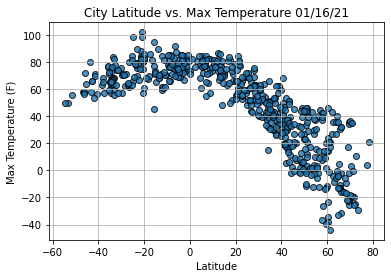

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

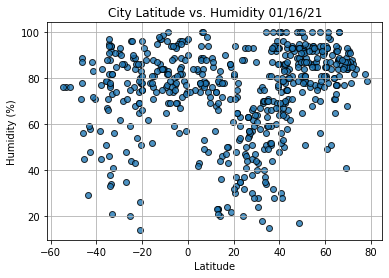

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

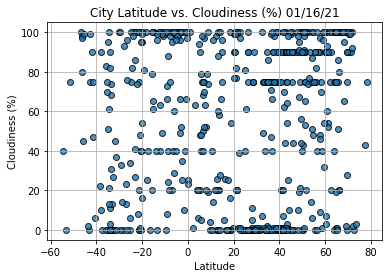

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

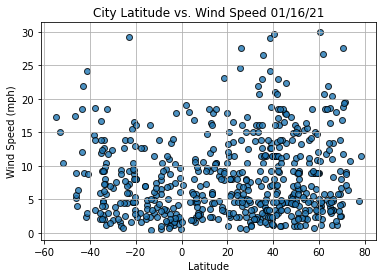

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [20]:
index13 = city_data_df.loc[13]
index13

City                    Upernavik
Country                        GL
Date          2021-01-17 03:33:40
Lat                       72.7868
Lng                      -56.1549
Max Temp                    10.27
Humidity                       82
Cloudiness                      0
Wind Speed                    6.4
Name: 13, dtype: object

In [21]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Pevek,RU,2021-01-17 03:32:35,69.7008,170.3133,-21.59,84,28,2.48
1,Oussouye,SN,2021-01-17 03:33:39,12.4850,-16.5469,73.40,68,0,9.22
4,Wahpeton,US,2021-01-17 03:33:39,46.2652,-96.6059,19.99,93,90,3.44
5,Okha,RU,2021-01-17 03:33:39,53.5739,142.9478,-12.60,86,14,15.37
7,Arlit,NE,2021-01-17 03:33:39,18.7369,7.3853,66.34,22,0,7.94


In [22]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

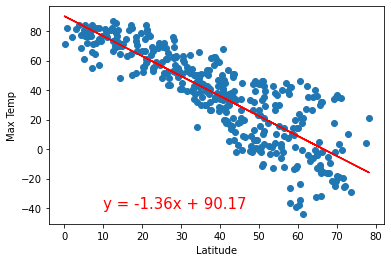

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,-40))

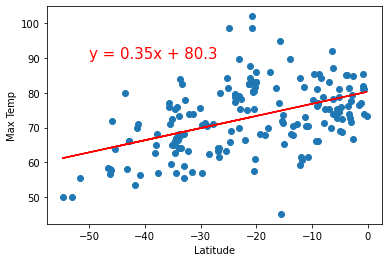

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

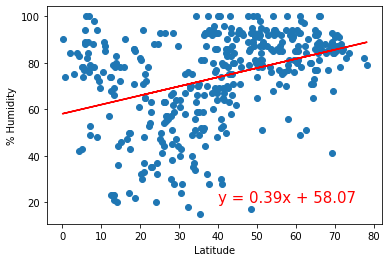

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,20))

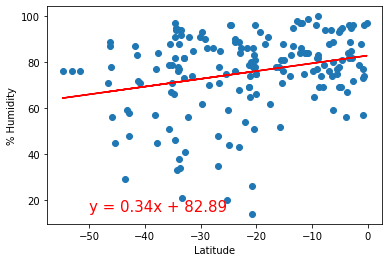

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

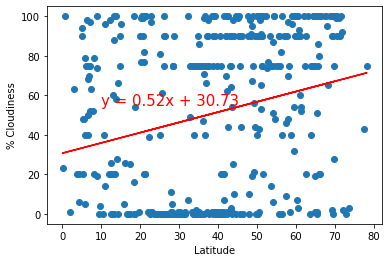

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,
                   'Linear Regression on the Northern Hemisphere \
                    for % Cloudiness', '% Cloudiness',(10,55))

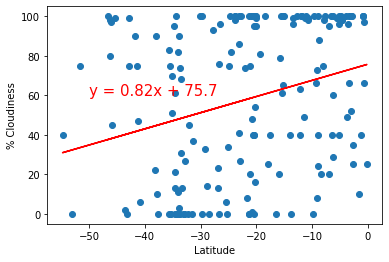

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

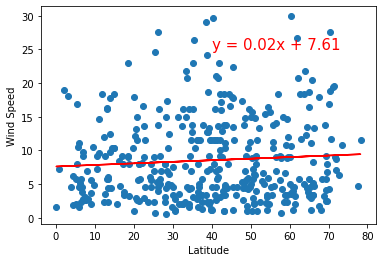

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,25))

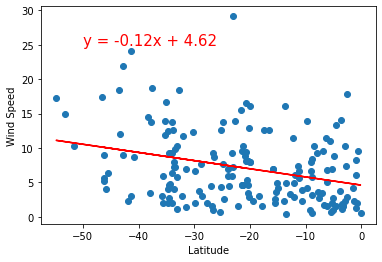

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,25))